<a href="https://colab.research.google.com/github/Jyoti1706/PythonDeepDive/blob/master/Shopping_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install simpy


In [2]:
import simpy
import numpy as np
import matplotlib.pyplot as plt
import random

In [3]:
"""
Inter_arrival_time = exponential(2) # Poission distribution
customer demand = Uniform[1,5] liters
milk fetch time = 1 min/ltr
num of cashier = 2
bill payment time = 2 min/customer
"""

'\nInter_arrival_time = exponential(2) # Poission distribution\ncustomer demand = Uniform[1,5] liters\nmilk fetch time = 1 min/ltr\nnum of cashier = 2\nbill payment time = 2 min/customer\n'

In [4]:
def customer(env, name, cashiers):
  milk_required = random.randint(1,5)
  print(f"{name} arrives at time {env.now:.2f} and requires {milk_required}L milk")
  yield env.timeout(milk_required)
  print(f"{name}: finishes retirieving the milk at time {env.now:.2f}.")
  with cashiers.request() as req:
    yield req
    print(f"{name}: gets  a cashier at time {env.now:.2f}.")
    yield env.timeout(2)
    print(f"{name}: leaves  at time {env.now:.2f}.")


def customer_generator(env, cashier):
  cust_num = 1
  while True:
    random_inter_arrival_time = random.expovariate(lambd = 2)
    yield env.timeout(random_inter_arrival_time)
    env.process(customer(env, name=f'customer_name {cust_num}', cashiers=cashiers))
    cust_num += 1

env = simpy.Environment()
cashiers = simpy.Resource(env, capacity=2)
env.process(customer_generator(env, cashiers))
env.run(until=10)

customer_name 1 arrives at time 0.92 and requires 1L milk
customer_name 2 arrives at time 1.16 and requires 2L milk
customer_name 3 arrives at time 1.80 and requires 1L milk
customer_name 1: finishes retirieving the milk at time 1.92.
customer_name 1: gets  a cashier at time 1.92.
customer_name 4 arrives at time 2.58 and requires 1L milk
customer_name 3: finishes retirieving the milk at time 2.80.
customer_name 3: gets  a cashier at time 2.80.
customer_name 5 arrives at time 2.93 and requires 3L milk
customer_name 6 arrives at time 3.07 and requires 4L milk
customer_name 2: finishes retirieving the milk at time 3.16.
customer_name 7 arrives at time 3.27 and requires 1L milk
customer_name 4: finishes retirieving the milk at time 3.58.
customer_name 1: leaves  at time 3.92.
customer_name 2: gets  a cashier at time 3.92.
customer_name 7: finishes retirieving the milk at time 4.27.
customer_name 8 arrives at time 4.33 and requires 3L milk
customer_name 9 arrives at time 4.49 and requires 1

### Containers

In [8]:
def customer(env, name, cashiers, fridge):
  milk_required = random.randint(1,5)
  print(f"{name} arrives at time {env.now:.2f} and requires {milk_required}L milk")
  yield env.timeout(milk_required)
  yield fridge.get(milk_required)
  print(f"{name}: finishes retirieving the milk at time {env.now:.2f}. Fridge has {fridge.level} L milk remaining")
  with cashiers.request() as req:
    yield req
    print(f"{name}: gets  a cashier at time {env.now:.2f}.")
    yield env.timeout(2)
    print(f"{name}: leaves  at time {env.now:.2f}.")


def customer_generator(env, cashier, fridge):
  cust_num = 1
  while True:
    random_inter_arrival_time = random.expovariate(lambd = 2)
    yield env.timeout(random_inter_arrival_time)
    env.process(customer(env, name=f'customer_name {cust_num}', cashiers=cashiers, fridge=fridge))
    cust_num += 1

env = simpy.Environment()
cashiers = simpy.Resource(env, capacity=2)
fridge = simpy.Container(env, capacity=50, init=15)
env.process(customer_generator(env, cashiers, fridge))
env.run(until=10)

customer_name 1 arrives at time 0.60 and requires 4L milk
customer_name 2 arrives at time 0.69 and requires 1L milk
customer_name 3 arrives at time 1.49 and requires 3L milk
customer_name 2: finishes retirieving the milk at time 1.69. Fridge has 14 L milk remaining
customer_name 2: gets  a cashier at time 1.69.
customer_name 4 arrives at time 1.69 and requires 1L milk
customer_name 5 arrives at time 1.69 and requires 4L milk
customer_name 4: finishes retirieving the milk at time 2.69. Fridge has 13 L milk remaining
customer_name 4: gets  a cashier at time 2.69.
customer_name 6 arrives at time 3.44 and requires 5L milk
customer_name 2: leaves  at time 3.69.
customer_name 7 arrives at time 3.89 and requires 4L milk
customer_name 8 arrives at time 4.15 and requires 4L milk
customer_name 9 arrives at time 4.22 and requires 5L milk
customer_name 10 arrives at time 4.28 and requires 1L milk
customer_name 3: finishes retirieving the milk at time 4.49. Fridge has 10 L milk remaining
customer_n

### Shared Resource

In [13]:
def customer(env, name, cashiers, fridge_resource, fridge_milk_container):
  milk_required = random.randint(1,5)
  print(f"{name} arrives at time {env.now:.2f} and requires {milk_required}L milk")
  with fridge_resource.request() as fridge_req:
    yield fridge_req
    yield env.timeout(milk_required)
    yield fridge_milk_container.get(milk_required)
  print(f"{name}: finishes retirieving the milk at time {env.now:.2f}. Fridge has {fridge_milk_container.level} L milk remaining")
  with cashiers.request() as req:
    yield req
    print(f"{name}: gets  a cashier at time {env.now:.2f}.")
    yield env.timeout(2)
    print(f"{name}: leaves  at time {env.now:.2f}.")


def customer_generator(env, cashier, fridge_resource, fridge_milk_containe):
  cust_num = 1
  while True:
    random_inter_arrival_time = random.expovariate(lambd = 2)
    yield env.timeout(random_inter_arrival_time)
    env.process(customer(env, name=f'customer_name {cust_num}', cashiers=cashiers, fridge_resource=fridge_resource, fridge_milk_container=fridge_milk_containe))
    cust_num += 1
random.seed(2)
env = simpy.Environment()
cashiers = simpy.Resource(env, capacity=2)
fridge_resource = simpy.Resource(env, capacity=1)
fridge_milk_container = simpy.Container(env, capacity=50, init=15)
env.process(customer_generator(env, cashiers, fridge_resource, fridge_milk_container))
env.run(until=20)

customer_name 1 arrives at time 1.56 and requires 1L milk
customer_name 1: finishes retirieving the milk at time 2.56. Fridge has 14 L milk remaining
customer_name 1: gets  a cashier at time 2.56.
customer_name 2 arrives at time 3.04 and requires 3L milk
customer_name 3 arrives at time 3.09 and requires 3L milk
customer_name 4 arrives at time 3.99 and requires 2L milk
customer_name 5 arrives at time 4.13 and requires 5L milk
customer_name 1: leaves  at time 4.56.
customer_name 6 arrives at time 4.60 and requires 4L milk
customer_name 7 arrives at time 5.17 and requires 5L milk
customer_name 8 arrives at time 5.68 and requires 5L milk
customer_name 2: finishes retirieving the milk at time 6.04. Fridge has 11 L milk remaining
customer_name 2: gets  a cashier at time 6.04.
customer_name 9 arrives at time 7.17 and requires 5L milk
customer_name 2: leaves  at time 8.04.
customer_name 10 arrives at time 8.55 and requires 1L milk
customer_name 11 arrives at time 8.70 and requires 3L milk
cust

### Cleaning the Code

In [14]:
def customer(env, name, cashiers, fridge):
  milk_required = random.randint(1,5)
  print(f"{name} arrives at time {env.now:.2f} and requires {milk_required}L milk")
  with fridge["resource"].request() as fridge_req:
    yield fridge_req
    yield env.timeout(milk_required)
    yield fridge["milk_container"].get(milk_required)
  print(f"{name}: finishes retirieving the milk at time {env.now:.2f}. Fridge has {fridge['milk_container'].level} L milk remaining")
  with cashiers.request() as req:
    yield req
    print(f"{name}: gets  a cashier at time {env.now:.2f}.")
    yield env.timeout(2)
    print(f"{name}: leaves  at time {env.now:.2f}.")


def customer_generator(env, cashier, fridge):
  cust_num = 1
  while True:
    random_inter_arrival_time = random.expovariate(lambd = 2)
    yield env.timeout(random_inter_arrival_time)
    env.process(customer(env, name=f'customer_name {cust_num}', cashiers=cashiers, fridge = fridge))
    cust_num += 1
random.seed(2)
env = simpy.Environment()
cashiers = simpy.Resource(env, capacity=2)
# fridge_resource = simpy.Resource(env, capacity=1)
# fridge_milk_container = simpy.Container(env, capacity=50, init=15)
fridge = {"resource": simpy.Resource(env, capacity=1), "milk_container":simpy.Container(env, capacity=50, init=15)}
env.process(customer_generator(env, cashiers, fridge))
env.run(until=20)

customer_name 1 arrives at time 1.56 and requires 1L milk
customer_name 1: finishes retirieving the milk at time 2.56. Fridge has 14 L milk remaining
customer_name 1: gets  a cashier at time 2.56.
customer_name 2 arrives at time 3.04 and requires 3L milk
customer_name 3 arrives at time 3.09 and requires 3L milk
customer_name 4 arrives at time 3.99 and requires 2L milk
customer_name 5 arrives at time 4.13 and requires 5L milk
customer_name 1: leaves  at time 4.56.
customer_name 6 arrives at time 4.60 and requires 4L milk
customer_name 7 arrives at time 5.17 and requires 5L milk
customer_name 8 arrives at time 5.68 and requires 5L milk
customer_name 2: finishes retirieving the milk at time 6.04. Fridge has 11 L milk remaining
customer_name 2: gets  a cashier at time 6.04.
customer_name 9 arrives at time 7.17 and requires 5L milk
customer_name 2: leaves  at time 8.04.
customer_name 10 arrives at time 8.55 and requires 1L milk
customer_name 11 arrives at time 8.70 and requires 3L milk
cust

### Yielding a Process

In [18]:
def customer(env, name, cashiers, fridge):
  milk_required = random.randint(1,5)
  print(f"{name} arrives at time {env.now:.2f} and requires {milk_required}L milk")
  with fridge["resource"].request() as fridge_req:
    yield fridge_req
    yield env.timeout(milk_required)
    yield fridge["milk_container"].get(milk_required)
  print(f"{name}: finishes retirieving the milk at time {env.now:.2f}. Fridge has {fridge['milk_container'].level} L milk remaining")
  with cashiers.request() as req:
    yield req
    print(f"{name}: gets  a cashier at time {env.now:.2f}.")
    yield env.timeout(2)
    print(f"{name}: leaves  at time {env.now:.2f}.")


def customer_generator(env, cashier, fridge):
  cust_num = 1
  while True:
    random_inter_arrival_time = random.expovariate(lambd = 2)
    yield env.timeout(random_inter_arrival_time)
    env.process(customer(env, name=f'customer_name {cust_num}', cashiers=cashiers, fridge = fridge))
    cust_num += 1



def fridge_refil_process(env, fridge):
  print(f"Fridge Refil Process called at {env.now:.2f}")
  yield env.timeout(2) # 2 minutes
  to_refill = 15-fridge["milk_container"].level
  print(f"Fridge current level before refilling: {fridge['milk_container'].level} L milk")
  yield fridge["milk_container"].put(to_refill)
  print(f"Fridge Refilled at {env.now:.2f}")


def fridge_control_process(env, fridge):
  while True:
    if fridge["milk_container"].level < 5:
      yield env.process(fridge_refil_process(env, fridge))
    yield env.timeout(random.uniform(10,20))

random.seed(2)
env = simpy.Environment()
cashiers = simpy.Resource(env, capacity=2)
fridge = {"resource": simpy.Resource(env, capacity=1), "milk_container":simpy.Container(env, capacity=50, init=15)}
env.process(customer_generator(env, cashiers, fridge))
env.process(fridge_control_process(env, fridge))
env.run(until=30)

customer_name 1 arrives at time 1.56 and requires 1L milk
customer_name 2 arrives at time 1.59 and requires 2L milk
customer_name 3 arrives at time 1.82 and requires 3L milk
customer_name 4 arrives at time 2.48 and requires 2L milk
customer_name 1: finishes retirieving the milk at time 2.56. Fridge has 14 L milk remaining
customer_name 1: gets  a cashier at time 2.56.
customer_name 5 arrives at time 2.63 and requires 5L milk
customer_name 6 arrives at time 3.09 and requires 4L milk
customer_name 7 arrives at time 3.66 and requires 5L milk
customer_name 8 arrives at time 4.17 and requires 5L milk
customer_name 1: leaves  at time 4.56.
customer_name 2: finishes retirieving the milk at time 4.56. Fridge has 12 L milk remaining
customer_name 2: gets  a cashier at time 4.56.
customer_name 9 arrives at time 5.66 and requires 5L milk
customer_name 2: leaves  at time 6.56.
customer_name 10 arrives at time 7.04 and requires 1L milk
customer_name 11 arrives at time 7.19 and requires 3L milk
cust

### Condition Event: Avoid long Queue

In [20]:
def customer(env, name, cashiers, fridge):
  milk_required = random.randint(1,5)
  print(f"{name} arrives at time {env.now:.2f} and requires {milk_required}L milk")
  with fridge["resource"].request() as fridge_req:
    res =  yield fridge_req | env.timeout(10)
    # print(res)
    if fridge_req in res:
      yield env.timeout(milk_required)
      yield fridge["milk_container"].get(milk_required)
    else:
      print(f"{name}: left without buying milk at time {env.now:.2f}")
      return
  print(f"{name}: finishes retirieving the milk at time {env.now:.2f}. Fridge has {fridge['milk_container'].level} L milk remaining")
  with cashiers.request() as req:
    yield req
    print(f"{name}: gets  a cashier at time {env.now:.2f}.")
    yield env.timeout(2)
    print(f"{name}: leaves  at time {env.now:.2f}.")


def customer_generator(env, cashier, fridge):
  cust_num = 1
  while True:
    random_inter_arrival_time = random.expovariate(lambd = 2)
    yield env.timeout(random_inter_arrival_time)
    env.process(customer(env, name=f'customer_name {cust_num}', cashiers=cashiers, fridge = fridge))
    cust_num += 1



def fridge_refil_process(env, fridge):
  print(f"Fridge Refil Process called at {env.now:.2f}")
  yield env.timeout(2) # 2 minutes
  to_refill = 15-fridge["milk_container"].level
  print(f"Fridge current level before refilling: {fridge['milk_container'].level} L milk")
  yield fridge["milk_container"].put(to_refill)
  print(f"Fridge Refilled at {env.now:.2f}")


def fridge_control_process(env, fridge):
  while True:
    if fridge["milk_container"].level < 5:
      yield env.process(fridge_refil_process(env, fridge))
    yield env.timeout(random.uniform(10,20))

random.seed(2)
env = simpy.Environment()
cashiers = simpy.Resource(env, capacity=2)
fridge = {"resource": simpy.Resource(env, capacity=1), "milk_container":simpy.Container(env, capacity=50, init=15)}
env.process(customer_generator(env, cashiers, fridge))
env.process(fridge_control_process(env, fridge))
env.run(until=60)

customer_name 1 arrives at time 1.56 and requires 1L milk
customer_name 2 arrives at time 1.59 and requires 2L milk
customer_name 3 arrives at time 1.82 and requires 3L milk
customer_name 4 arrives at time 2.48 and requires 2L milk
customer_name 1: finishes retirieving the milk at time 2.56. Fridge has 14 L milk remaining
customer_name 1: gets  a cashier at time 2.56.
customer_name 5 arrives at time 2.63 and requires 5L milk
customer_name 6 arrives at time 3.09 and requires 4L milk
customer_name 7 arrives at time 3.66 and requires 5L milk
customer_name 8 arrives at time 4.17 and requires 5L milk
customer_name 1: leaves  at time 4.56.
customer_name 2: finishes retirieving the milk at time 4.56. Fridge has 12 L milk remaining
customer_name 2: gets  a cashier at time 4.56.
customer_name 9 arrives at time 5.66 and requires 5L milk
customer_name 2: leaves  at time 6.56.
customer_name 10 arrives at time 7.04 and requires 1L milk
customer_name 11 arrives at time 7.19 and requires 3L milk
cust

### Business KPI: Case Study
1. No of Fridges vs Lost Customer

In [28]:
SIM_TIME  = 1*24*60 # 1 day
stats = {"customer_lost":0,
         "customer_lost_iter":[],
         "customer_lost_experiment":[]}

def customer(env, name, cashiers, fridges):
  milk_required = random.randint(1,5)
  # print(f"{name} arrives at time {env.now:.2f} and requires {milk_required}L milk")
  waiting_customer = [len(fridge["resource"].queue) for fridge in fridges]
  fridge_num = waiting_customer.index(min(waiting_customer))
  fridge = fridges[fridge_num]
  with fridge["resource"].request() as fridge_req:
    res =  yield fridge_req | env.timeout(10)
    # print(res)
    if fridge_req in res:
      yield env.timeout(milk_required)
      yield fridge["milk_container"].get(milk_required)
    else:
      # print(f"{name}: left without buying milk at time {env.now:.2f}")
      stats["customer_lost"] += 1
      return
  # print(f"{name}: finishes retirieving the milk at time {env.now:.2f}. Fridge has {fridge['milk_container'].level} L milk remaining")
  with cashiers.request() as req:
    yield req
    # print(f"{name}: gets  a cashier at time {env.now:.2f}.")
    yield env.timeout(2)
    # print(f"{name}: leaves  at time {env.now:.2f}.")


def customer_generator(env, cashier, fridges):
  cust_num = 1
  while True:
    random_inter_arrival_time = random.expovariate(lambd = 2)
    yield env.timeout(random_inter_arrival_time)
    env.process(customer(env, name=f'customer_name {cust_num}', cashiers=cashiers, fridges = fridges))
    cust_num += 1



def fridge_refil_process(env, fridge):
  # print(f"Fridge Refil Process called at {env.now:.2f}")
  yield env.timeout(2) # 2 minutes
  to_refill = 15-fridge["milk_container"].level
  # print(f"Fridge current level before refilling: {fridge['milk_container'].level} L milk")
  yield fridge["milk_container"].put(to_refill)
  # print(f"Fridge Refilled at {env.now:.2f}")


def fridge_control_process(env, fridge):
  while True:
    if fridge["milk_container"].level < 5:
      yield env.process(fridge_refil_process(env, fridge))
    yield env.timeout(random.uniform(10,20))

for num_fridges in range(1,11):
  for r in range(10):
    env = simpy.Environment()
    cashiers = simpy.Resource(env, capacity=2)
    fridges = [{"resource": simpy.Resource(env, capacity=1), "milk_container":simpy.Container(env, capacity=50, init=15)} for i in range(num_fridges)]
    env.process(customer_generator(env, cashiers, fridges))
    for fridge in fridges:
      env.process(fridge_control_process(env, fridge))
    env.run(until=60)
    stats["customer_lost_iter"].append(stats["customer_lost"])
    stats["customer_lost"] = 0
  stats["customer_lost_experiment"].append(np.mean(stats["customer_lost_iter"]))
  stats["customer_lost_iter"] = []


In [29]:
stats

{'customer_lost': 0,
 'customer_lost_iter': [],
 'customer_lost_experiment': [89.0,
  67.3,
  55.4,
  33.5,
  23.9,
  17.5,
  9.9,
  7.0,
  3.2,
  3.0]}

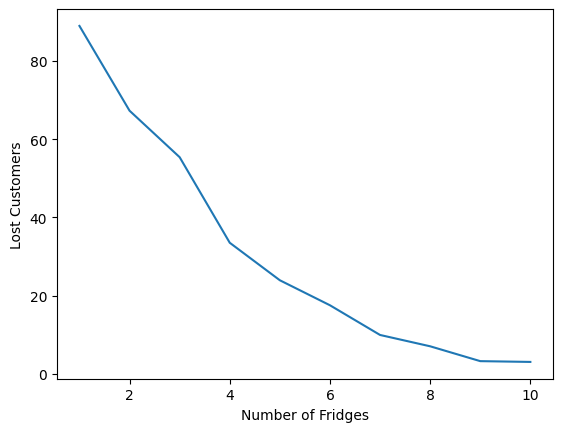

In [30]:
import matplotlib.pyplot as plt
plt.plot(range(1,11), stats["customer_lost_experiment"])
plt.xlabel("Number of Fridges")
plt.ylabel("Lost Customers")
plt.show()

In [ ]:
# prompt: Task
# 1. Simulate vessels arriving to the container terminal. The time between vessel arrivals follows an exponential distribution with an average of 5 hours. This is the input that drives the simulation. Each vessel carries 150 containers that needs to be discharged (unloaded).
# 2. The vessels will need to berth at the terminal and there are only 2 available slots (berth_1 & berth_2). This means th

# Define the simulation environment
env = simpy.Environment()

# Define the exponential distribution for vessel arrivals
inter_arrival_time = simpy.Expon(1/5, 1, env)

# Define the number of available berths
num_berths = 2

# Define a function to generate vessels
def vessel_generator(env, inter_arrival_time):
    while True:
        # Generate the time until the next vessel arrives
        time_until_arrival = inter_arrival_time.sample()

        # Wait for the next vessel to arrive
        yield env.timeout(time_until_arrival)

        # Create a new vessel
        vessel = Vessel(env)

# Define a function to represent a vessel
class Vessel(object):
    def __init__(self, env):
        self.env = env
        self.containers = 150

        # Request a berth
        self.berth = env.process(self.request_berth())

    def request_berth(self):
        # Wait for a berth to become available
        with env.request(berth) as req:
            yield req

            # Berth the vessel
            print('Vessel berthed at time {}'.format(env.now))

            # Discharge the containers
            yield env.timeout(self.containers)

            # Depart the vessel
            print('Vessel departed at time {}'.format(env.now))

# Start the simulation
env.process(vessel_generator(env, inter_arrival_time))
env.run(until=100)
